In [296]:
import pandas as pd
import os
import datetime as dt
import re
import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

In [297]:
# Считываем файлы
data = pd.read_excel("~/Desktop/GIT/ЭКОПСИ Base_18.10.xlsx")
grades = pd.read_excel("~/Desktop/GIT/Грейды.xlsx")
weights = pd.read_excel("~/Desktop/GIT/Веса.xlsx")

In [298]:
# Добавляем новый столбец для рассчета полной ставки для всех сторудников
data['ФОТ 1'] = data['ФОТ'] * (1 / data['Ставка'])

In [299]:
# Отчищаем данные от всех наблюдений, не подходящих условия ТЗ
def data_filter(raw_data):
    filtered_data = raw_data[(raw_data['Уровень необходимой квалификации'] <= 6) & (raw_data['Уровень необходимой квалификации'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Уровень свободы в принятии решений'] <= 5) & (filtered_data['Уровень свободы в принятии решений'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Роль в формировании методологии и правил своего подразделения'] <= 3) & (filtered_data['Роль в формировании методологии и правил своего подразделения'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Роль в формировании методологии и правил Компании'] <= 4) & (filtered_data['Роль в формировании методологии и правил Компании'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Количество людей в административном подчинении'] <= 5) & (filtered_data['Количество людей в административном подчинении'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении'] <= 4) & (filtered_data['Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Цель общения внутри Компании'] <= 3) & (filtered_data['Цель общения внутри Компании'] >= 1)]
    filtered_data = filtered_data[(filtered_data['Годовой объём прямого влияния на финансовый результат Компании '] <= 5) & (filtered_data['Годовой объём прямого влияния на финансовый результат Компании '] >= 1)]
    filtered_data = filtered_data[(filtered_data['Стоимость разовой ошибки'] <= 5) & (filtered_data['Стоимость разовой ошибки'] >= 1)]
    filtered_data = filtered_data[filtered_data['ФОТ 1'] >= 12130]
    return filtered_data

data = data_filter(data)

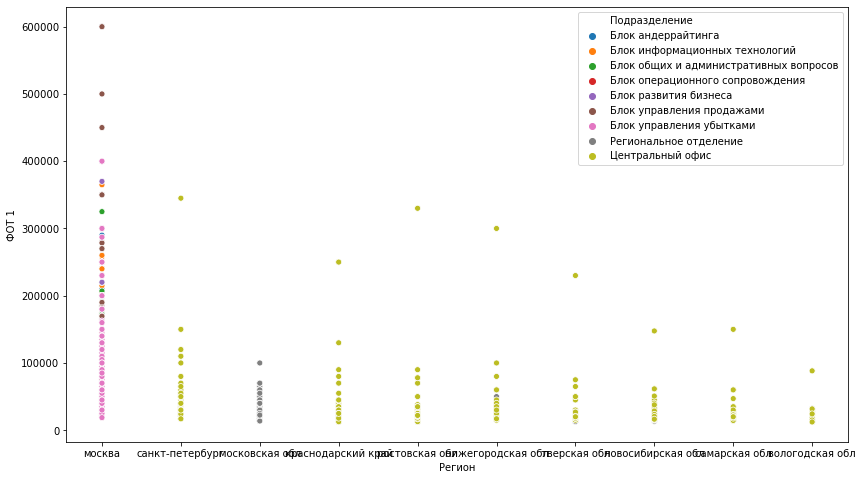

In [300]:
# Распределение уровня зарплат по террирориальному признаку
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Регион', y='ФОТ 1', hue='Подразделение')

In [301]:
# Вычисление уровня грейда
def get_grades(dataset):
    """Функция вычесляет номер грейда для каждого сотрудника (столбца), 
    используя разработанные уровни грейдов и веса для каждлго критерия оценки. 
    Можно менять колонки и добавлять новые, а так же исправлять названия колонок, если они изменились"""
    
    column_lst = ['Уровень необходимой квалификации', 'Уровень свободы в принятии решений',
           'Роль в формировании методологии и правил своего подразделения',
           'Роль в формировании методологии и правил Компании',
           'Количество людей в административном подчинении',
           'Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении',
           'Цель общения внутри Компании',
           'Годовой объём прямого влияния на финансовый результат Компании ',
           'Стоимость разовой ошибки']
    
# Накапливает номер грейда для каждой строки
    grade_lst = []
    weights_row = weights.iloc[0]
    for (j, row_data) in dataset.iterrows():
#       Создает пару ключ-значение для сопоставления значений с грейдом 
#       Чем ближе значение к нулю, тем лучше грейд подходит сотруднику
        grade_value = {a: 0 for a in range(12)}
        for (i, row) in grades.iterrows():
#           Накапливает сумму отклонений для каждого горейда 
            sum = 0
            for column in column_lst:
#               Добавляет значение по модулю при сопоставлении с критерием из списка, деля на вес критерия
                sum += abs(row_data[column] - row[column]) / weights_row[column]
#     Добавляет соответсвующему грейду сумммарное значение
            grade_value[i] = sum
#     Ищет самое минимальное оклонение среди значений грейдаов в словаре
        grade = min(grade_value, key=grade_value.get)
#     и присваевает соответствующий грейд, добавляя его в список. 
#     Добавляем 1 так как в словаре grade_value отсчет начинается с 0
        grade_lst.append(grade + 1)
    return grade_lst

In [302]:
# Добавляем список с грейдами в основную таблицу
data['Грейд'] = get_grades(data)

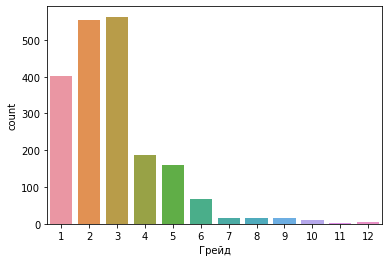

In [303]:
# Распределение численности сотрудников по грейдам
sns.countplot(data['Грейд'])

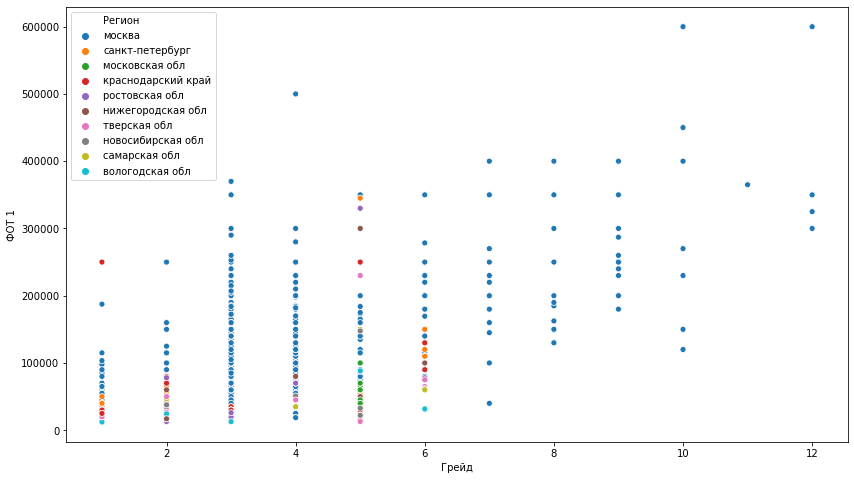

In [304]:
# Распределение уровня зарплаты относительно грейда и региона
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Грейд', y='ФОТ 1', hue='Регион')

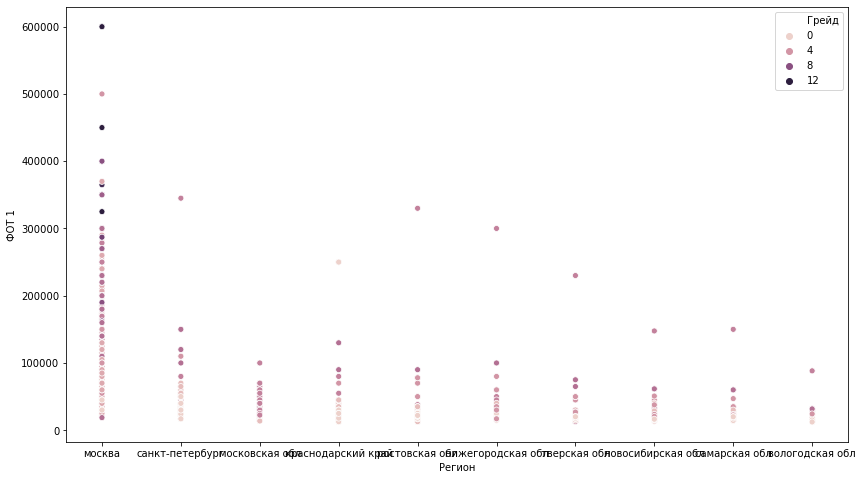

In [186]:
# Региональное распределение по уровню з/п и грейду
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Регион', y='ФОТ 1', hue='Грейд')

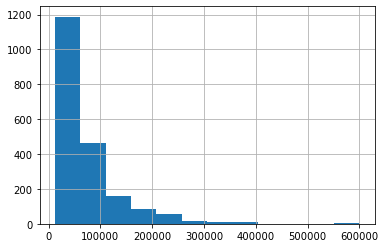

In [105]:
data['ФОТ 1'].hist(bins=12)